## Plotting Gyro relations

I'm going to quickly overplot the Gyrochronology relations (not considering critical Rossby Number cutoff) presented in Angus et al. 2015.

These are those reported in Barnes (2007), Mamajek & Hillenbrand (2008) and Angus et al (2015).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')
import mystyle
plt.style.use(mystyle.ms)

ati = pd.read_csv('../../data/atium.csv',index_col=0)
print('We have {} stars'.format(len(ati)))

We have 95 stars


In [3]:
ati = ati[np.isfinite(ati.P.values)]   #Exclude stars without results
ati = ati[ati.chainflag < 1]            #Exclude stars without well constrained results
ati = ati[ati.KIC != 7680114]          #Exclude star that is clearly unevolved
print('We have {} stars'.format(len(ati)))

We have 48 stars


Read in colours from Simbad

In [5]:
# bv = pd.read_csv('../../data/simbad_colours.txt',index_col=0, sep='|')
# bv['KIC'] = [int(str(kic)[4:]) for kic in bv['KIC'].values]
# bv.loc[bv['B'] == -99] = np.nan
# bv.loc[bv['V'] == -99] = np.nan
# bv['BV'] = bv.B - bv.V
# bv = bv[['KIC','BV']]

# ati = pd.merge(ati, bv, how='left', on='KIC')
# ati = ati[np.isfinite(ati.BV.values)]
# print('We have {} stars'.format(len(ati)))

$P = \tau^a \times b(BP-RP - c)^d$

where $P$ is rotation in days
$\tau$ is age (in Myr),
BP-RP are colour in magnitude,
the rest are free parameters


In [7]:
barnes = [0.7725, 0.601, 0.4, 0.5189]
mamajek = [0.409, 0.325, 0.495, 0.566]
angus = [0.40, 0.31, 0.45, 0.55]
ours = [0.5380376085895715, 0.5659898043933116, 0.321367381257116, 1.7055924587446913]

sun = {'age': 4.603,
       'P' : 24,
       'M' : 1,
       'R' : 1,
       'BV' : 0.656}
sun['bprp'] = 0.0981 + 1.4290*sun['BV'] + -0.0269*sun['BV']**2 + 0.0061*sun['BV']**3

In [12]:
def gyro(tau, bv, a, b, c, d):
    return (tau*1000)**a * b*(bv - c)**d

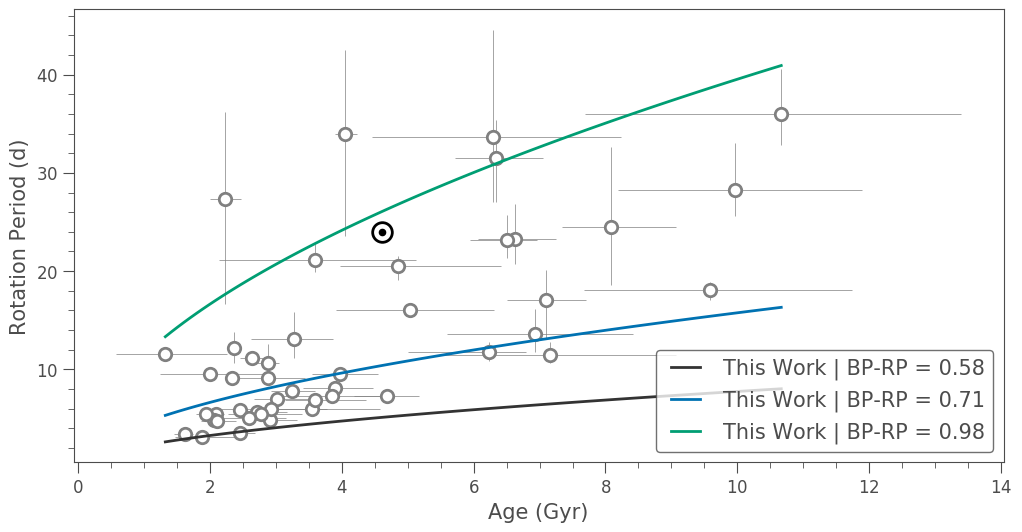

In [18]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(figsize=(12,6))
    c = ax.scatter(ati.age, ati.P, lw=2, ec='grey', c='white',s=80, zorder=2)
    plt.errorbar(ati.age, ati.P, xerr=[ati.loage, ati.upage], yerr=[ati.l_P, ati.u_P],
                fmt='|', zorder=1, color='grey')

    tau = np.linspace(ati.age.min(), ati.age.max(), 100)
    for col in np.percentile(ati.bprp, [0, 50, 100]):
#         plt.plot(tau, gyro(tau, bv, *angus), lw=2, ls='-.', label='Angus | B-V = {:.2f}'.format(bv))
#         plt.plot(tau, gyro(tau, bv, *barnes), lw=2, ls=':', label='Barnes | B-V = {:.2f}'.format(bv))
#         plt.plot(tau, gyro(tau, bv, *mamajek), lw=2, ls='-', label='M+H | B-V = {:.2f}'.format(bv))
        plt.plot(tau, gyro(tau, col, *ours), lw=2, ls='-', label='This Work | BP-RP = {:.2f}'.format(col))

    plt.scatter(sun['age'],sun['P'], s=200, c='white', ec='k',lw=2)
    plt.scatter(sun['age'],sun['P'], s=20, c='k')

    ax.set_axisbelow(True)
    ax.set_xlabel('Age (Gyr)')
    ax.set_ylabel('Rotation Period (d)')
#     ax.set_yscale('log')
    ax.legend(loc='lower right',fontsize=15)
    # fig.colorbar(c,label=r'$BP-RP$')
    plt.show()



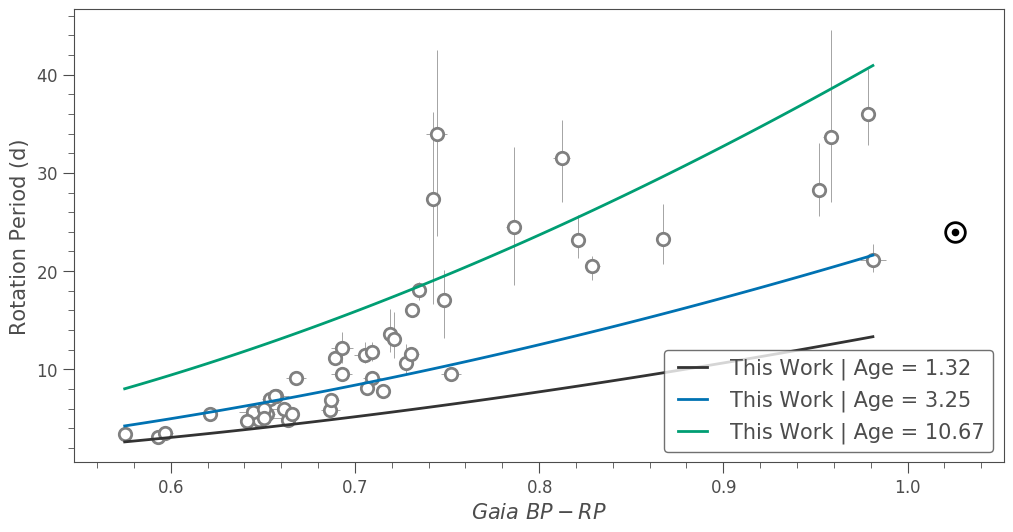

In [28]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(figsize=(12,6))
    c = ax.scatter(ati.bprp, ati.P, lw=2, ec='grey', c='white',s=80, zorder=2)
    plt.errorbar(ati.bprp, ati.P, xerr=ati.ebprp, yerr=[ati.l_P, ati.u_P],
                fmt='|', zorder=1, color='grey')

    bprp = np.linspace(ati.bprp.min(), ati.bprp.max(), 100)
    for tau in np.percentile(ati.age, [0, 50, 100]):
        plt.plot(bprp, gyro(tau, bprp, *ours), lw=2, ls='-', label='This Work | Age = {:.2f}'.format(tau))
        
    plt.scatter(sun['bprp'],sun['P'], s=200, c='white', ec='k',lw=2)
    plt.scatter(sun['bprp'],sun['P'], s=20, c='k')

    ax.set_axisbelow(True)
    ax.set_xlabel(r'$Gaia$ $BP-RP$')
    ax.set_ylabel('Rotation Period (d)')
#     ax.set_yscale('log')
    ax.legend(loc='lower right',fontsize=15)
    # fig.colorbar(c,label=r'$BP-RP$')
    plt.show()

## Lets make another plot showing where the hypothetical Rossby cutoff would be

$R_{\rm o, crit} = 2.16 \pm 0.09$

$P_{\rm crit} = R_{\rm o, crit} \times \tau_{\rm cv}$, where

$\log(\tau_{\rm cv}) = 1.16 - 1.49\log(M / M_{\odot}) - 0.54\log(M / M_{\odot})^2$

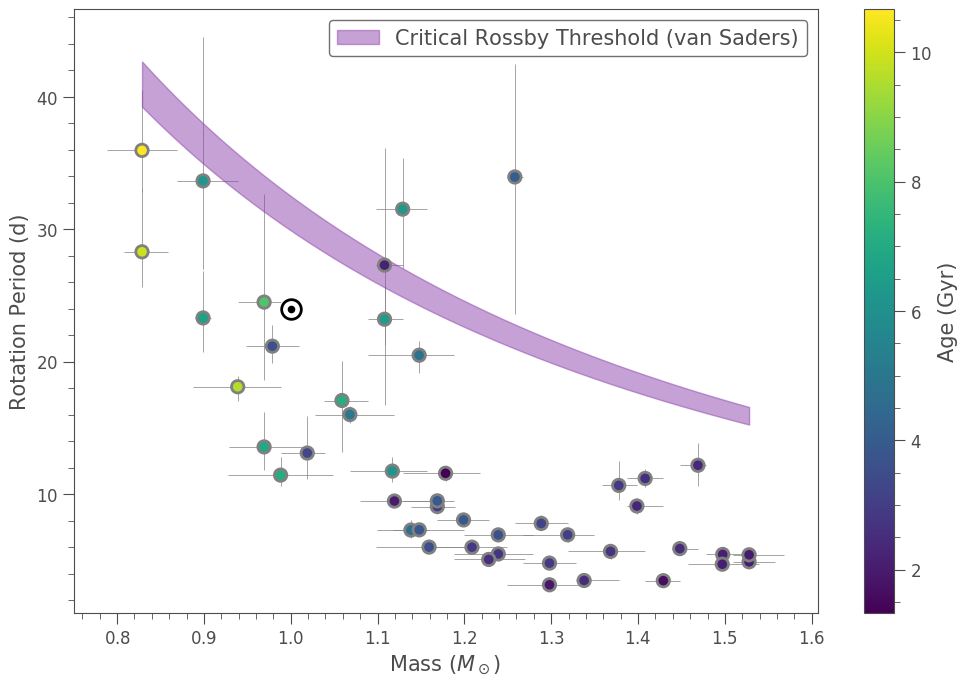

In [29]:
M = np.linspace(ati.modmass.min(), ati.modmass.max(), 100)
tcv = 10**(1.16 - 1.49*np.log10(M) - 0.54*np.log10(M)**2)

with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(figsize=(12,8))
    c = ax.scatter(ati.modmass, ati.P, lw=2, ec='grey', c=ati.age,s=80, zorder=2)
    plt.errorbar(ati.modmass, ati.P, xerr=[ati.lomodmass, ati.upmodmass], yerr=[ati.l_P, ati.u_P],
                fmt='|', zorder=1, color='grey')

    plt.fill_between(M, (2.16+0.09) * tcv, (2.16-0.09) * tcv, color='#8d44ad', alpha=.5, label='Critical Rossby Threshold (van Saders)')
    
    plt.scatter(sun['M'],sun['P'], s=200, c='white', ec='k',lw=2)
    plt.scatter(sun['M'],sun['P'], s=20, c='k')

    ax.set_axisbelow(True)
    ax.set_xlabel(r'Mass ($M_\odot$)')
    ax.set_ylabel('Rotation Period (d)')
#     ax.set_yscale('log')
    fig.colorbar(c, label='Age (Gyr)')
    ax.legend(loc='best',fontsize=15)
    plt.show()

#### If there is a critical threshold after which period no longer increased we would see flatlines branching off from this relation, or at least everything remaining consistently below it, which we do see

## Lets make a plot showing the $\sqrt(\tau)$ relation

No handles with labels found to put in legend.


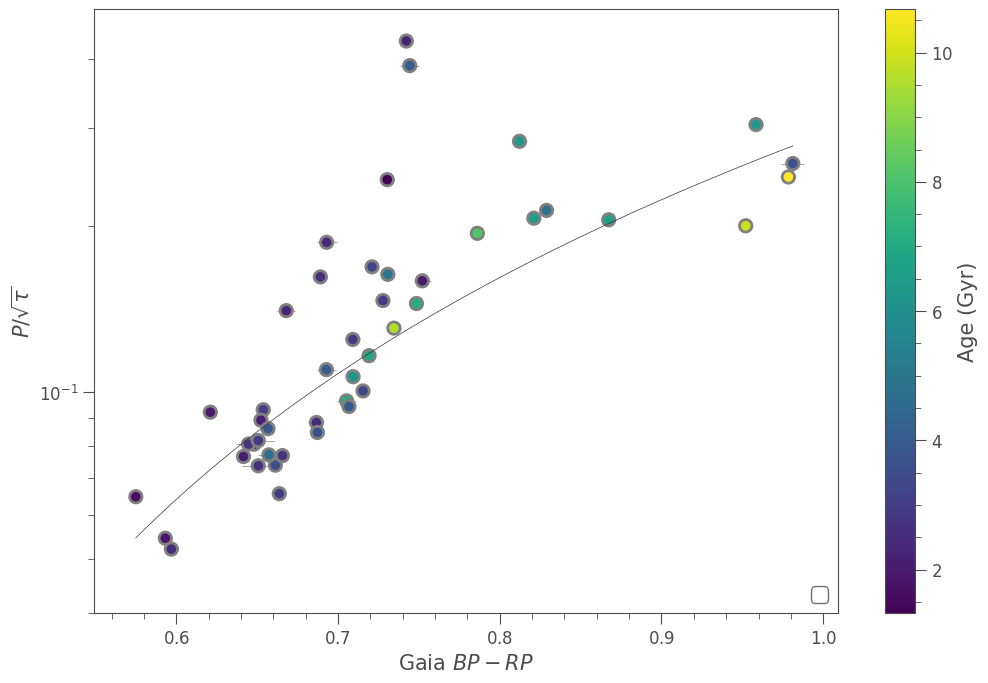

In [34]:
with plt.style.context(mystyle.ms):
    fig, ax = plt.subplots(figsize=(12,8))
    
    c = ax.scatter(ati.bprp, ati.P/(ati.age*1000)**ours[0], lw=2, ec='grey', c=ati.age,s=80, zorder=2)
    ax.errorbar(ati.bprp, ati.P/(ati.age*1000)**ours[0], xerr=ati.ebprp,
            fmt='|', zorder=1, color='grey')
    agex = np.linspace(ati.age.min(), ati.age.max(), 100)
    bvx = np.linspace(ati.bprp.min(), ati.bprp.max(), 100)
    
    ax.plot(bvx, gyro(agex, bvx, *ours)/(agex*1000)**ours[0])
    
    ax.set_axisbelow(True)
    ax.set_xlabel(r'Gaia $BP-RP$')
    ax.set_ylabel(r'$P / \sqrt{\tau}$')
    ax.set_yscale('log')
    ax.legend(loc='lower right',fontsize=15)
    fig.colorbar(c,label='Age (Gyr)')
    plt.show()

